In [1]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)
from gp import *
import pandas as pd


In [2]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


In [3]:
funcdict = {
	'add' : 5,
	'sub' : 5,
	'mul' : 4,
	'div' : 3,
	'inv' : 1,
	'log' : 3,
	'max' : 1,
	'min' : 1,
	'sqrt' : 2,
	'exp' : 3,
	'floor': 1
}

gp = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
res = gp.execute(x,y, generations=50)
res

TypeError: bad operand type for abs(): 'NoneType'

In [ ]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	162.64342659444503
best fitness penalizado:	167.5227293922784


In [ ]:
(res["best_trees"][0]).pprint()


  mul_________
 /            \
x     0.10356598601847389



In [ ]:
(res["best_trees"][-1]).pprint()


                      ______________________________________________________________mul_________
                     /                                                                          \
                ___add_________________________________________________________         0.10356598601847389
               /                                                               \
     ________max                                                            __floor
    /           \                                                          /
  sub___         x                            ___________________________sqrt
 /      \                                    /
x       sqrt                      _________add___
       /                         /               \
      x                -0.6640872540978584       div_________
                                                /            \
                                               x     -0.0758434502907619



In [ ]:
#arbol = "div(x,log(sub(mul(div(inv(log(inv(log(0.4981859242141673)))),mul(inv(log(0.4981859242141673)),log(log(inv(0.4981859242141673))))),log(x)),div(x,div(inv(log(inv(0.4981859242141673))),mul(inv(log(inv(0.4981859242141673))),log(0.7107532914770232)))))))"
#sympy.sympify(arbol,locals=SYMPY_FUNC_CONVERTER)
#arbol.sympify_str()

In [ ]:
print(res['best_trees'][-1])

mul(add(max(sub(x,sqrt(x)),x),floor(sqrt(add(-0.6640872540978584,div(x,-0.0758434502907619))))),0.10356598601847389)


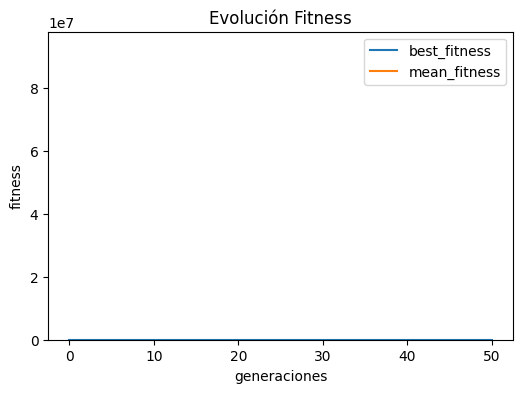

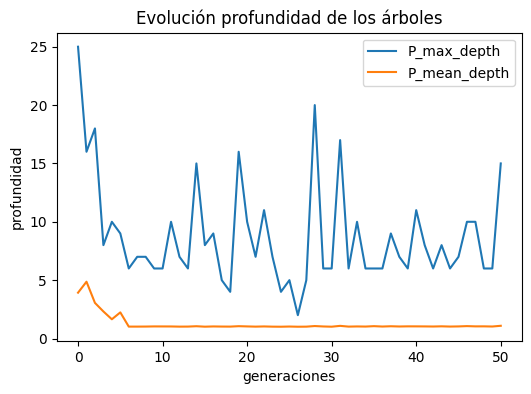

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.ylim(0,res['mean_fitness'][5])
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()